In [1]:
import torch  
from torch.autograd import grad
import torch.nn as nn
from numpy import genfromtxt
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.functional as F
import pandas as pd
import numpy as np
torch.manual_seed(1234)

In [2]:
#df = genfromtxt('sihdr.csv', delimiter=',') #in the form of [t,S,I,H,D,R]
df = pd.read_csv("C:/Users/Nikan/Downloads/canadadata/canada3.csv")
print(df)
df.head(763)

       t       date     I   D     H     R         N
0      1   4/1/2020  1541  23   520   370  38155012
1      2   4/2/2020  1603  49   571   305  38155012
2      3   4/3/2020  1203  53   596   354  38155012
3      4   4/4/2020  1404  83   668   413  38155012
4      5   4/5/2020  1573  75   697   365  38155012
..   ...        ...   ...  ..   ...   ...       ...
758  759  4/29/2022  7111  84  6620  7994  38155012
759  760  4/30/2022  2139  36  6540  3342  38155012
760  761   5/1/2022  2880  23  6635  5023  38155012
761  762   5/2/2022  4069   5  6699  6568  38155012
762  763   5/3/2022  5778  44  6646  9044  38155012

[763 rows x 7 columns]


,t,date,I,D,H,R,N
0,1,4/1/2020,1541,23,520,370,38155012
1,2,4/2/2020,1603,49,571,305,38155012
2,3,4/3/2020,1203,53,596,354,38155012
3,4,4/4/2020,1404,83,668,413,38155012
4,5,4/5/2020,1573,75,697,365,38155012
...,...,...,...,...,...,...,...
758,759,4/29/2022,7111,84,6620,7994,38155012
759,760,4/30/2022,2139,36,6540,3342,38155012
760,761,5/1/2022,2880,23,6635,5023,38155012
761,762,5/2/2022,4069,5,6699,6568,38155012


In [3]:
I=df.iloc[:,2]#.astype(float) 
I.head()
print(I)
date=df.iloc[:,1]
t=df.iloc[:,0]
H=df.iloc[:,4].astype(float) 
D=df.iloc[:,3].astype(float) 
R=df.iloc[:,5].astype(float) 
R.head()
N=df.iloc[:,6].astype(float) 
#S=N-(I+D+R).astype(float)

0      1541
1      1603
2      1203
3      1404
4      1573
       ... 
758    7111
759    2139
760    2880
761    4069
762    5778
Name: I, Length: 763, dtype: int64


In [4]:
cumulative_infected=np.cumsum(I)
cumulative_dead=np.cumsum(D)
cumulative_recovered=np.cumsum(R)
cumulative_H=np.cumsum(H)
cumulative_S=N-(cumulative_infected+cumulative_dead+cumulative_recovered)
#cumulative_recovered.head()
#print(len(cumulative_infected))
#t.head()

In [5]:
infected=I
dead=D
recovered=R
H=H
#susceptible=N-(infected+dead+recovered)
#cumulative_recovered.head()
#print(len(cumulative_infected))
df.head()

,t,date,I,D,H,R,N
0,1,4/1/2020,1541,23,520,370,38155012
1,2,4/2/2020,1603,49,571,305,38155012
2,3,4/3/2020,1203,53,596,354,38155012
3,4,4/4/2020,1404,83,668,413,38155012
4,5,4/5/2020,1573,75,697,365,38155012


In [6]:
cumulative_cases = np.asarray([ date,t,cumulative_S, cumulative_infected, cumulative_dead, cumulative_recovered, cumulative_H]).

columns = ['date','t','cumulative_susceptible','cumulative_infected',  'cumulative_dead','cumulative_recovered', 'cumulative_H']
cumulative_cases = pd.DataFrame(cumulative_cases,columns=columns)
#covid_cumulative_cases['t'] = covid_cumulative_cases['t'].astype(float)
cumulative_cases.tail()

,date,t,cumulative_susceptible,cumulative_infected,cumulative_dead,cumulative_recovered,cumulative_H
758,4/29/2022,759,3.08852e+07,3753882,39468,3.47645e+06,1.94217e+06
759,4/30/2022,760,3.08797e+07,3756021,39504,3.47979e+06,1.94871e+06
760,5/1/2022,761,3.08718e+07,3758901,39527,3.48481e+06,1.95534e+06
761,5/2/2022,762,3.08611e+07,3762970,39532,3.49138e+06,1.96204e+06
762,5/3/2022,763,3.08463e+07,3768748,39576,3.50043e+06,1.96869e+06


In [7]:
#sidr_TW = sidr_TW.drop(labels=range(0, 15), axis=0)
cumulative_cases = cumulative_cases.drop(cumulative_cases.index[761:763])
cumulative_cases= cumulative_cases.reset_index(drop=True)
cumulative_cases.tail(10)

,date,t,cumulative_susceptible,cumulative_infected,cumulative_dead,cumulative_recovered,cumulative_H
751,4/22/2022,752,3.09843e+07,3699423,38988,3.43226e+06,1.8949e+06
752,4/23/2022,753,3.09774e+07,3702548,39046,3.43602e+06,1.90156e+06
753,4/24/2022,754,3.09636e+07,3709399,39072,3.44295e+06,1.90832e+06
754,4/25/2022,755,3.09488e+07,3715826,39087,3.45128e+06,1.91519e+06
755,4/26/2022,756,3.09346e+07,3723499,39133,3.4578e+06,1.92198e+06
756,4/27/2022,757,3.09156e+07,3735477,39247,3.46472e+06,1.92878e+06
757,4/28/2022,758,3.09004e+07,3746771,39384,3.46846e+06,1.93555e+06
758,4/29/2022,759,3.08852e+07,3753882,39468,3.47645e+06,1.94217e+06
759,4/30/2022,760,3.08797e+07,3756021,39504,3.47979e+06,1.94871e+06
760,5/1/2022,761,3.08718e+07,3758901,39527,3.48481e+06,1.95534e+06


In [8]:
cumulative_cases['cumulative_I_Ave'] = cumulative_cases['cumulative_infected'].rolling(7).mean()
cumulative_cases['cumulative_D_Ave'] = cumulative_cases['cumulative_dead'].rolling(7).mean()
cumulative_cases['cumulative_R_Ave'] = cumulative_cases['cumulative_recovered'].rolling(7).mean()
cumulative_cases['cumulative_H_Ave'] = cumulative_cases['cumulative_H'].rolling(7).mean()
cumulative_cases=cumulative_cases.drop(cumulative_cases.index[0:7])
cumulative_cases=cumulative_cases.reset_index(drop=True)
cumulative_cases.head()

,date,t,cumulative_susceptible,cumulative_infected,cumulative_dead,cumulative_recovered,cumulative_H,cumulative_I_Ave,cumulative_D_Ave,cumulative_R_Ave,cumulative_H_Ave
0,4/8/2020,8,3.81399e+07,11214,518,3360,7121,7169.714286,283.714286,1913.285714,3615.142857
1,4/9/2020,9,3.81376e+07,12751,621,4018,8775,8542.142857,362.142857,2390.857143,4712.857143
2,4/10/2020,10,3.81355e+07,14083,715,4720,10491,9933.000000,446.428571,2918.142857,5970.571429
3,4/11/2020,11,3.81335e+07,15294,834,5357,12266,11296.285714,535.857143,3477.428571,7386.428571
4,4/12/2020,12,3.81318e+07,16406,943,5879,14098,12593.714286,630.142857,4059.142857,8964.428571


In [9]:
def SIHDR( covid_cumulative_cases, s, e, pop):
    d1 = pd.to_datetime(cumulative_cases['date'])[s:e]
    d2 = cumulative_cases['cumulative_I_Ave'][s:e]
    d3 = cumulative_cases['cumulative_D_Ave'][s:e]
    d4 = cumulative_cases['cumulative_R_Ave'][s:e]
    d5 = cumulative_cases['cumulative_H_Ave'][s:e]
    d6 = cumulative_cases['t'][s:e]
    date = []
    I = [] 
    D = []
    R = []
    H=[]
    timesteps = []
    for item in range(s,e):
        #print(item)
        
        date.append(d1[item])
        I.append(d2[item]) 
        D.append(d3[item])
        R.append(d4[item])
        H.append(d5[item])
        timesteps.append(d6[item])
    dff3 = np.asarray([ date,timesteps, I,D, R,H]).T
    columns = ['date','t','I','D','R','H']
    df3= pd.DataFrame(dff3,columns=columns)

    interpolated=df3.interpolate(method='linear', limit_direction='forward', axis=0)
    interpolatedI=[-x+pop for x in interpolated.iloc[:,1]]#map(lambda x:-x+pop, interpolated.iloc[:,1])
    interpolated['S']=interpolatedI-interpolated.iloc[:,2]-interpolated.iloc[:,3]-interpolated.iloc[:,4]
    #interpolated.head()
    SIDRH_data=interpolated
    SIDRH_data = SIDRH_data[["t","S", "I", "D","R","H"]]
    return SIDRH_data

In [10]:
pop=38e6
ndays=30
j=0
COVID=[None]*(len(cumulative_cases)-ndays)

for i in range(0,(len(cumulative_cases)//ndays)-1):
    COVID[j]=SIHDR(cumulative_cases, i*ndays, (i+1)*ndays, pop)
    j=j+1

In [11]:
for i in range(0,(len(cumulative_cases)//ndays)-1):
    COVID[i]=COVID[i].reset_index(drop=True)

In [12]:
#COVID[30]


In [13]:
len(cumulative_cases)//ndays-1

24

In [14]:
def csvmaker(COVID,i):    
    #print (COVID[i])
    SIDRH1 = np.asarray([ COVID[i].S, COVID[i].I, COVID[i].D,COVID[i].R, COVID[i].H]).T
    
    columns = ['Susceptible','Infected','Deaths','Recovered','Hospitalized']
    SIDRH1 = pd.DataFrame(SIDRH1,columns=columns)
    #data1['time'] = data1['time'].astype(float)
        #SIDRH1.tail()
    SIDRH1.to_csv("C:/Users/Nikan/Downloads/canadadata/canada3.csv"+str(i)+".csv")#,index=False)
    #np.savetxt("/Users/elhamshamsara/Desktop/codes/Germany/g[0].csv", data1, fmt=' '.join(['%i'] + ['%1.4f']*4), delimiter=",")
    #data1=np.savetxt("/Users/elhamshamsara/Desktop/codes/Germany/g[0].csv", data1,columns , delimiter=",")
    covid_cumulative_cases = pd.read_csv("C:/Users/Nikan/Downloads/canadadata/canada3.csv"+str(i)+".csv", delimiter=',') #in the form of [t,S,I,D,R]
    covid_cumulative_cases.columns = ['t', 'cumulative_susceptible','cumulative_infected', 'cumulative_dead', 'cumulative_recovered','cumulative_hospitelazed'] #rename columns
    covid_cumulative_cases['t'] = covid_cumulative_cases['t'].astype(float) 
    return covid_cumulative_cases
covid_cumulative_cases = csvmaker (COVID,len(cumulative_cases)//ndays-2)

In [15]:
def datatotimesteps(covid_cumulative_cases):
    #take only a sample of 31
    cumulative_susceptible = []
    cumulative_infected = [] 
    cumulative_dead = []
    cumulative_recovered = []
    cumulative_hospitelazed=[]
    timesteps = []
    
    length= len (covid_cumulative_cases['t'])
    d1 = covid_cumulative_cases['cumulative_susceptible'][:length]
    d2 = covid_cumulative_cases['cumulative_infected'][:length]
    d3 = covid_cumulative_cases['cumulative_dead'][:length]
    d4 = covid_cumulative_cases['cumulative_recovered'][:length]
    d5 = covid_cumulative_cases['cumulative_hospitelazed'][:length]
    d6 = covid_cumulative_cases['t'][:length]

    for item in range(len(d6)):
        #if item%10 == 0:
            cumulative_susceptible.append(d1[item])
            cumulative_infected.append(d2[item]) 
            cumulative_dead.append(d3[item])
            cumulative_recovered.append(d4[item])
            cumulative_hospitelazed.append(d5[item])
            timesteps.append(d6[item])
    return timesteps, cumulative_susceptible, cumulative_infected, cumulative_dead, cumulative_recovered,cumulative_hospitelazed

steps = datatotimesteps(covid_cumulative_cases)
#print(steps[0])        

In [16]:
%%time

#PATH = 'covid_real_data_cumulative_cases' 

class DINN(nn.Module):
    def __init__(self, t, S_data, I_data, D_data, R_data, H_data, path1): #[t,S,I,D,R,H]
        super(DINN, self).__init__()
        self.N = 38e6 #population size
        self.t = torch.tensor(t, requires_grad=True)
        self.t_float = self.t.float()
        self.t_batch = torch.reshape(self.t_float, (len(self.t),1)) #reshape for batch 
        self.S = torch.tensor(S_data)
        self.I = torch.tensor(I_data)
        self.D = torch.tensor(D_data)
        self.R = torch.tensor(R_data)
        self.H = torch.tensor(H_data)

        self.losses = []
        self.save = 3 #which file to save to

        self.alpha_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True)) #0.191
        self.beta_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True)) #0.05
        self.eta_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True)) 
        self.delta_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True)) 
        self.fi_tilda = torch.nn.Parameter(torch.rand(1, requires_grad=True)) 

        
        #find values for normalization
        self.S_max = max(self.S)
        self.I_max = max(self.I)
        self.D_max = max(self.D)
        self.R_max = max(self.R)
        self.H_max = max(self.H)
        self.S_min = min(self.S)
        self.I_min = min(self.I)
        self.D_min = min(self.D)
        self.R_min = min(self.R)
        self.H_min = min(self.H)

        #normalize
        self.S_hat = (self.S - self.S_min) / (self.S_max - self.S_min)
        self.I_hat = (self.I - self.I_min) / (self.I_max - self.I_min)
        self.D_hat = (self.D - self.D_min) / (self.D_max - self.D_min)
        self.R_hat = (self.R - self.R_min) / (self.R_max - self.R_min)
        self.H_hat = (self.H - self.H_min) / (self.H_max - self.H_min)


        #matrices (x4 for S,I,D,R,H) for the gradients
        self.m1 = torch.zeros((len(self.t), 5)); self.m1[:, 0] = 1
        self.m2 = torch.zeros((len(self.t), 5)); self.m2[:, 1] = 1
        self.m3 = torch.zeros((len(self.t), 5)); self.m3[:, 2] = 1
        self.m4 = torch.zeros((len(self.t), 5)); self.m4[:, 3] = 1
        self.m5 = torch.zeros((len(self.t), 5)); self.m4[:, 4] = 1


        #NN
        self.net_sidrh = self.Net_sidrh()
        self.params = list(self.net_sidrh.parameters())
        self.params.extend(list([self.alpha_tilda, self.beta_tilda, self.eta_tilda, self.delta_tilda, self.fi_tilda]))

    #force parameters to be in a range
    @property
    def alpha(self):
        return torch.tanh(self.alpha_tilda) #*0.191*80

    @property
    def beta(self):
        return torch.tanh(self.beta_tilda) #*0.05*80
    
    
    @property
    def eta(self):
        return torch.tanh(self.eta_tilda) #*0.071*80
    
    @property
    def delta(self):
        return torch.tanh(self.delta_tilda) #*0.06*80
    
    @property
    def fi(self):
        return torch.tanh(self.fi_tilda) #*0.015*80
    

    #nets
    class Net_sidrh(nn.Module): # input = [t]
        def __init__(self):
            super(DINN.Net_sidrh, self).__init__()
            self.fc1=nn.Linear(1, 20) 
            self.fc2=nn.Linear(20, 20)
            self.fc3=nn.Linear(20, 20)
            self.fc4=nn.Linear(20, 20)
            self.fc5=nn.Linear(20, 20)
            self.fc6=nn.Linear(20, 20)
            self.fc7=nn.Linear(20, 20)
            self.fc8=nn.Linear(20, 20)
            self.fc9=nn.Linear(20, 20)
            self.fc10=nn.Linear(20, 20)
            self.out=nn.Linear(20, 5) #outputs S, I, D, R,H

        def forward(self, t_batch):
            sidrh=F.relu(self.fc1(t_batch))
            sidrh=F.relu(self.fc2(sidrh))
            sidrh=F.relu(self.fc3(sidrh)) ذ
            sidrh=F.relu(self.fc4(sidrh))
            sidrh=F.relu(self.fc5(sidrh))
            sidrh=F.relu(self.fc6(sidrh))
            sidrh=F.relu(self.fc7(sidrh))
            sidrh=F.relu(self.fc8(sidrh))
            sidrh=F.relu(self.fc9(sidrh))
            sidrh=F.relu(self.fc10(sidrh))
            sidrh=self.out(sidrh)
            return sidrh
            
    def net_f(self, t_batch):
        sidrh_hat = self.net_sidrh(t_batch)
        #print (t_batch)
        #print ('sidr_hat',sidr_hat)
        
        S_hat, I_hat, D_hat, R_hat, H_hat = sidrh_hat[:,0], sidrh_hat[:,1], sidrh_hat[:,2], sidrh_hat[:,3], sidrh_hat[:,4]
        #print ('sidr_hat[:5,0]',sidr_hat[:5,0])
        #print ('sidr_hat[:5,1]',sidr_hat[:5,1])
        #print (S_hat)
        
        #S_t
        sidrh_hat.backward(self.m1, retain_graph=True)
        
        S_hat_t = self.t.grad.clone()
        self.t.grad.zero_()

        #I_t
        sidrh_hat.backward(self.m2, retain_graph=True)
        
        I_hat_t = self.t.grad.clone()
        self.t.grad.zero_()

        #D_t
        sidrh_hat.backward(self.m3, retain_graph=True)
        
        D_hat_t = self.t.grad.clone()
        self.t.grad.zero_()

        #R_t
        sidrh_hat.backward(self.m4, retain_graph=True)
        
        R_hat_t = self.t.grad.clone()
        self.t.grad.zero_()
        
        #H_t
        sidrh_hat.backward(self.m5, retain_graph=True)
        
        H_hat_t = self.t.grad.clone()
        self.t.grad.zero_()
        

        #unnormalize
        S = self.S_min + (self.S_max - self.S_min) * S_hat
        I = self.I_min + (self.I_max - self.I_min) * I_hat
        D = self.D_min + (self.D_max - self.D_min) * D_hat      
        R = self.R_min + (self.R_max - self.R_min) * R_hat
        H = self.H_min + (self.H_max - self.H_min) * H_hat


        f1_hat = S_hat_t - (-(self.alpha / self.N) * S * I)  / (self.S_max - self.S_min)
        f2_hat = I_hat_t - (((self.alpha / self.N) * S * I) - self.beta * I - self.delta * I ) / (self.I_max - self.I_min)
        f3_hat = D_hat_t - (self.fi * H) / (self.D_max - self.D_min)
        f4_hat = R_hat_t - (self.beta * I + self.eta * H) / (self.R_max - self.R_min)
        f5_hat = H_hat_t - (self.delta * I - self.fi * H - self.eta * H) / (self.H_max - self.H_min)


        return f1_hat, f2_hat, f3_hat, f4_hat, f5_hat , S_hat, I_hat, D_hat, R_hat, H_hat
    def load(self,path1):
      # Load checkpoint
      try:
        checkpoint = torch.load(path1 + str(self.save)+'.pt') 
        #print('\nloading pre-trained model...')############
        self.load_state_dict(checkpoint['model'])
        self.optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        self.scheduler.load_state_dict(checkpoint['scheduler'])
        epoch = checkpoint['epoch']
         
        self.losses = checkpoint['losses']
         

      except RuntimeError :
          print('changed the architecture, ignore')
          pass
      except FileNotFoundError:
          pass

    def train(self, n_epochs,path1):
      #try loading
      self.load(path1)#########################################

      #train
      print('\nstarting training...\n')
      
      for epoch in range(n_epochs):
        #lists to hold the output (maintain only the final epoch)
        S_pred_list = []
        I_pred_list = []
        D_pred_list = []
        R_pred_list = []
        H_pred_list = []

         
        f1, f2, f3, f4,f5, S_pred, I_pred, D_pred, R_pred,H_pred = self.net_f(self.t_batch)
        self.optimizer.zero_grad()

        S_pred_list.append(self.S_min + (self.S_max - self.S_min) * S_pred) 
        I_pred_list.append(self.I_min + (self.I_max - self.I_min) * I_pred)
        D_pred_list.append(self.D_min + (self.D_max - self.D_min) * D_pred)
        R_pred_list.append(self.R_min + (self.R_max - self.R_min) * R_pred)
        H_pred_list.append(self.H_min + (self.H_max - self.H_min) * H_pred)
        
        length=len(self.S_hat)
        end = int(length-(length)/10)
        #print (end)
        if epoch == 1:
            pass
            #print ('self.S_hat',self.S_hat[:5])
            #print ('S_pred',S_pred[:5])
            #print ('f1',f1[:5])
            
        loss = (torch.mean(torch.square(self.S_hat[:end] - S_pred[:end]))+ 
                torch.mean(torch.square(self.I_hat[:end] - I_pred[:end]))+
                torch.mean(torch.square(self.D_hat[:end] - D_pred[:end]))+
                torch.mean(torch.square(self.R_hat[:end] - R_pred[:end]))+
                torch.mean(torch.square(self.H_hat[:end] - H_pred[:end]))+
                torch.mean(torch.square(f1[:end]))+
                torch.mean(torch.square(f2[:end]))+
                torch.mean(torch.square(f3[:end]))+
                torch.mean(torch.square(f4[:end]))+
                torch.mean(torch.square(f5[:end]))
                ) 

         
        loss.backward()
        self.optimizer.step()
        self.scheduler.step() 
         
         

        self.losses.append(loss.item())

        if epoch % 1000 == 0:          
          print('\nEpoch ', epoch)

        #loss + model parameters update
        if epoch % 1000 == 0:
          #checkpoint save every 100 epochs if the loss is lower
          print('\nSaving model... Loss is: ', loss)
          torch.save({
              'epoch': epoch,
              'model': self.state_dict(),
              'optimizer_state_dict': self.optimizer.state_dict(),
              'scheduler': self.scheduler.state_dict(),
              #'loss': loss,
              'losses': self.losses,
              }, path1 + str(self.save)+'.pt')
          if self.save % 2 > 0: #its on 3
            self.save = 2 #change to 2
          else: #its on 2
            self.save = 3 #change to 3

          print('epoch: ', epoch)
        

      return S_pred_list, I_pred_list, D_pred_list, R_pred_list, H_pred_list

Wall time: 0 ns


In [17]:
%%time

path = "C:/Users/Nikan/Downloads/canadadata/canada3.csv"
def net (path,n,m,epoch=50000):
    data = [None]*((len(cumulative_cases)//ndays)-1)
    dinn = [None]*((len(cumulative_cases)//ndays)-1)
    for i in range (n,m):#len(g)):
        covid_cumulative_cases = csvmaker (COVID,i)
        steps = datatotimesteps(covid_cumulative_cases)
        COVID[i].t, COVID[i].S, COVID[i].I, COVID[i].D, COVID[i].R,COVID[i].H = steps
        path2 = path+str(i)+"_"
        
        dinn[i] = DINN(COVID[i].t, COVID[i].S, COVID[i].I, COVID[i].D, COVID[i].R, COVID[i].H,path2) #in the form of [t,S,I,D,R]
        #dinn[i] = DINN((g[i].t).tolist(), (g[i].S).tolist(), (g[i].I).tolist(), (g[i].D).tolist(), (g[i].R).tolist())
        
        learning_rate = 1e-5
        optimizer = optim.Adam(dinn[i].params, lr = learning_rate)
        dinn[i].optimizer = optimizer

 
        scheduler = torch.optim.lr_scheduler.CyclicLR(dinn[i].optimizer, base_lr=1e-5, max_lr=1e-3, step_size_up=1000, mode="exp_range", gamma=0.85, cycle_momentum=False)
        print(scheduler)
        dinn[i].scheduler = scheduler
        
        try: 
          S_pred_list, I_pred_list, D_pred_list, R_pred_list, H_pred_list = dinn[i].train(epoch,path2) #train
        except EOFError:
          if dinn[i].save == 2:
            dinn[i].save = 3
            S_pred_list, I_pred_list, D_pred_list, R_pred_list, H_pred_list = dinn[i].train(epoch,path2) #train
          elif dinn.save == 3:
            dinn[i].save = 2
            S_pred_list, I_pred_list, D_pred_list, R_pred_list, H_pred_list = dinn[i].train(epoch,path2) #train
        data[i] = S_pred_list, I_pred_list, D_pred_list, R_pred_list, H_pred_list
    return data, dinn

Wall time: 0 ns


In [18]:
n=0
m=(len(cumulative_cases)//ndays)-1
#print (m)
out = net(path,10,20,epoch=50000)


starting training...


Epoch  0

Saving model... Loss is:  tensor(0.0741, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  0

Epoch  1000

Saving model... Loss is:  tensor(0.0515, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  1000

Epoch  2000

Saving model... Loss is:  tensor(0.0336, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  2000

Epoch  3000

Saving model... Loss is:  tensor(0.0200, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  3000

Epoch  4000

Saving model... Loss is:  tensor(0.0105, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  4000

Epoch  5000

Saving model... Loss is:  tensor(0.0045, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  5000

Epoch  6000

Saving model... Loss is:  tensor(0.0014, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  6000

Epoch  7000

Saving model... Loss is:  tensor(0.0003, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  7000

Epoch  8000

Saving model... Loss is:  tensor(3.0895e-05, dtype=torch.float64,

epoch:  18000

Epoch  19000

Saving model... Loss is:  tensor(0.0005, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  19000

Epoch  20000

Saving model... Loss is:  tensor(0.0004, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  20000

Epoch  21000

Saving model... Loss is:  tensor(0.0004, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  21000

Epoch  22000

Saving model... Loss is:  tensor(0.0004, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  22000

Epoch  23000

Saving model... Loss is:  tensor(0.0004, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  23000

Epoch  24000

Saving model... Loss is:  tensor(0.0004, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  24000

Epoch  25000

Saving model... Loss is:  tensor(0.0004, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  25000

Epoch  26000

Saving model... Loss is:  tensor(0.0004, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  26000

Epoch  27000

Saving model... Loss is:  tensor(0.0004, dtype=torc


Epoch  40000

Saving model... Loss is:  tensor(0.0013, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  40000

Epoch  41000

Saving model... Loss is:  tensor(0.0013, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  41000

Epoch  42000

Saving model... Loss is:  tensor(0.0013, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  42000

Epoch  43000

Saving model... Loss is:  tensor(0.0012, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  43000

Epoch  44000

Saving model... Loss is:  tensor(0.0011, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  44000

Epoch  45000

Saving model... Loss is:  tensor(0.0011, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  45000

Epoch  46000

Saving model... Loss is:  tensor(0.0010, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  46000

Epoch  47000

Saving model... Loss is:  tensor(0.0009, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  47000

Epoch  48000

Saving model... Loss is:  tensor(0.0009, dtype=torch.float64, gra


Epoch  10000

Saving model... Loss is:  tensor(83.6692, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  10000

Epoch  11000

Saving model... Loss is:  tensor(80.6740, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  11000

Epoch  12000

Saving model... Loss is:  tensor(77.9670, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  12000

Epoch  13000

Saving model... Loss is:  tensor(75.4901, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  13000

Epoch  14000

Saving model... Loss is:  tensor(73.1737, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  14000

Epoch  15000

Saving model... Loss is:  tensor(70.9596, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  15000

Epoch  16000

Saving model... Loss is:  tensor(68.8030, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  16000

Epoch  17000

Saving model... Loss is:  tensor(66.6814, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  17000

Epoch  18000

Saving model... Loss is:  tensor(64.5838, dtype=torch.flo

epoch:  30000

Epoch  31000

Saving model... Loss is:  tensor(0.0029, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  31000

Epoch  32000

Saving model... Loss is:  tensor(0.0027, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  32000

Epoch  33000

Saving model... Loss is:  tensor(0.0026, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  33000

Epoch  34000

Saving model... Loss is:  tensor(0.0025, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  34000

Epoch  35000

Saving model... Loss is:  tensor(0.0024, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  35000

Epoch  36000

Saving model... Loss is:  tensor(0.0024, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  36000

Epoch  37000

Saving model... Loss is:  tensor(0.0023, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  37000

Epoch  38000

Saving model... Loss is:  tensor(0.0022, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  38000

Epoch  39000

Saving model... Loss is:  tensor(0.0021, dtype=torc


Epoch  1000

Saving model... Loss is:  tensor(517.2552, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  1000

Epoch  2000

Saving model... Loss is:  tensor(515.5484, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  2000

Epoch  3000

Saving model... Loss is:  tensor(513.8070, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  3000

Epoch  4000

Saving model... Loss is:  tensor(512.0160, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  4000

Epoch  5000

Saving model... Loss is:  tensor(510.1887, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  5000

Epoch  6000

Saving model... Loss is:  tensor(508.3286, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  6000

Epoch  7000

Saving model... Loss is:  tensor(506.4045, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  7000

Epoch  8000

Saving model... Loss is:  tensor(504.4194, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  8000

Epoch  9000

Saving model... Loss is:  tensor(502.4011, dtype=torch.float64, gr


Epoch  21000

Saving model... Loss is:  tensor(306.4201, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  21000

Epoch  22000

Saving model... Loss is:  tensor(306.3360, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  22000

Epoch  23000

Saving model... Loss is:  tensor(306.2834, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  23000

Epoch  24000

Saving model... Loss is:  tensor(306.2551, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  24000

Epoch  25000

Saving model... Loss is:  tensor(306.2441, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  25000

Epoch  26000

Saving model... Loss is:  tensor(306.2408, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  26000

Epoch  27000

Saving model... Loss is:  tensor(306.5134, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  27000

Epoch  28000

Saving model... Loss is:  tensor(306.2381, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  28000

Epoch  29000

Saving model... Loss is:  tensor(306.2370, dtype=


Epoch  41000

Saving model... Loss is:  tensor(537.4947, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  41000

Epoch  42000

Saving model... Loss is:  tensor(537.4905, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  42000

Epoch  43000

Saving model... Loss is:  tensor(537.4896, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  43000

Epoch  44000

Saving model... Loss is:  tensor(537.4849, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  44000

Epoch  45000

Saving model... Loss is:  tensor(537.4820, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  45000

Epoch  46000

Saving model... Loss is:  tensor(537.4787, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  46000

Epoch  47000

Saving model... Loss is:  tensor(537.7267, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  47000

Epoch  48000

Saving model... Loss is:  tensor(537.4729, dtype=torch.float64, grad_fn=<AddBackward0>)
epoch:  48000

Epoch  49000

Saving model... Loss is:  tensor(537.4698, dtype=

([None, None, None, None, None, None, None, None, None, None, ([tensor([35993800., 35993404., 35992932., 35992528., 35992192., 35991224.,
        35990748., 35990164., 35989620., 35988568., 35988060., 35987552.,
        35987048., 35986540., 35986032., 35985532., 35985032., 35984532.,
        35984032., 35983532., 35983032., 35982532., 35982032., 35981532.,
        35981036., 35980536., 35980036., 35979536., 35979036., 35978536.,
        35978036., 35977536., 35977036., 35976536., 35976036., 35975536.,
        35975036., 35974536., 35974036., 35973536., 35973036., 35972536.,
        35972040., 35971540., 35971040., 35970540., 35970040., 35969540.,
        35969040., 35968540., 35968040., 35967540., 35967040., 35966540.,
        35966040., 35965540., 35965040., 35964540., 35964040., 35963540.,
        35963044., 35962544., 35962044., 35961544., 35961044., 35960544.,
        35960044., 35959544., 35959044., 35958544., 35958044., 35957544.,
        35957044., 35956544., 35956044., 3595554

Text(0, 0.5, 'Losse')

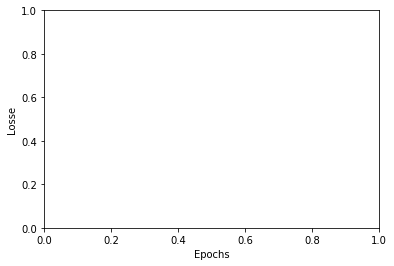

In [19]:
print(out)
if(out[1][i]):
    plt.plot(out[1][i].losses[0:], color = 'teal')    



plt.xlabel('Epochs')
plt.ylabel('Losse')

In [20]:
def plotting(i):
  
    #S_pred_list:out[0][i][0][0], I_pred_list:out[0][i][1][0]
    length=len(COVID[i].t)
    ending = int(length-(length)/10)

    ax[0].scatter(COVID[i].t[:ending]+(i*length), COVID[i].S[:ending], c = 'black', alpha=0.5, lw=2, label='Susceptible Data')
    ax[0].scatter(COVID[i].t[ending:]+(i*length), COVID[i].S[ending:], c = 'gold', alpha=0.5, lw=5, label='Future Data')
    ax[0].plot(COVID[i].t+(i*length), out[0][i][0][0].detach().numpy(), 'red', alpha=0.9, lw=2, label='Susceptible Prediction', linestyle='dashed')

    ax[1].scatter(COVID[i].t[:ending]+(i*length), COVID[i].I[:ending], c = 'violet', alpha=0.5, lw=2, label='Infected Data')
    ax[1].scatter(COVID[i].t[ending:]+(i*length), COVID[i].I[ending:], c = 'gold', alpha=0.5, lw=5, label='Future Data')
    ax[1].plot(COVID[i].t+(i*length), out[0][i][1][0].detach().numpy(), 'black', alpha=0.9, lw=2, label='Infected Prediction', linestyle='dashed')

    ax[2].scatter(COVID[i].t[:ending]+(i*length), COVID[i].D[:ending], c = 'black', alpha=0.5, lw=2, label='Dead Data')
    ax[2].scatter(COVID[i].t[ending:]+(i*length), COVID[i].D[ending:], c = 'gold', alpha=0.5, lw=5, label='Future Data')
    ax[2].plot(COVID[i].t+(i*length), out[0][i][2][0].detach().numpy(), 'green', alpha=0.9, lw=2, label='Dead Prediction', linestyle='dashed')

    ax[3].scatter(COVID[i].t[:ending]+(i*length), COVID[i].R[:ending], c = 'blue', alpha=0.5, lw=2, label='Recovered Data')
    ax[3].scatter(COVID[i].t[ending:]+(i*length), COVID[i].R[ending:], c = 'gold', alpha=0.5, lw=5, label='Future Data')
    ax[3].plot(COVID[i].t+(i*length), out[0][i][3][0].detach().numpy(), 'teal', alpha=0.9, lw=2, label='Recovered Prediction', linestyle='dashed')
    
    ax[4].scatter(COVID[i].t[:ending]+(i*length), COVID[i].H[:ending], c = 'violet', alpha=0.5, lw=2, label='Infected Data')
    ax[4].scatter(COVID[i].t[ending:]+(i*length), COVID[i].H[ending:], c = 'gold', alpha=0.5, lw=5, label='Future Data')
    ax[4].plot(COVID[i].t+(i*length), out[0][i][4][0].detach().numpy(), 'black', alpha=0.9, lw=2, label='Infected Prediction', linestyle='dashed')

    ax[0].set_xlabel('Time /hours',size = 20)
    ax[0].set_ylabel('Number',size = 20)
    ax[0].yaxis.set_tick_params(length=0)
    ax[0].xaxis.set_tick_params(length=0)
    # ax[0, 0].grid(b=True, which='major', c='black', lw=0.2, ls='-')
    legend = ax[0].legend(prop={'size':18})
    legend.get_frame().set_alpha(0.5)
    #for spine in ('top', 'right', 'bottom', 'left'):
     #   ax[0].spines[spine].set_visible(False)
    ############################################################
    ax[0].set_xlabel('Time /hours',size = 20)
    ax[0].set_ylabel('Number',size = 20)
    ax[0].yaxis.set_tick_params(length=0)
    ax[0].xaxis.set_tick_params(length=0)
    # ax[1, 0].grid(b=True, which='major', c='black', lw=0.2, ls='-')
    legend = ax[0].legend(prop={'size':18})
    legend.get_frame().set_alpha(0.5)
    #for spine in ('top', 'right', 'bottom', 'left'):
      #  ax[0].spines[spine].set_visible(False)
    ############################################################
    ax[1].set_xlabel('Time /hours',size = 20)
    ax[1].set_ylabel('Number',size = 20)
    ax[1].yaxis.set_tick_params(length=0)
    ax[1].xaxis.set_tick_params(length=0)
    # ax[0, 1].grid(b=True, which='major', c='black', lw=0.2, ls='-')
    legend = ax[1].legend(prop={'size':18})
    legend.get_frame().set_alpha(0.5)
    #for spine in ('top', 'right', 'bottom', 'left'):
     #   ax[1].spines[spine].set_visible(False)
    ############################################################
    ax[2].set_xlabel('Time /hours',size = 20)
    ax[2].set_ylabel('Number',size = 20)
    ax[2].yaxis.set_tick_params(length=0)
    ax[2].xaxis.set_tick_params(length=0)
    # ax[1, 1].grid(b=True, which='major', c='black', lw=0.2, ls='-')
    legend = ax[2].legend(prop={'size':18})
    legend.get_frame().set_alpha(0.5)
   # for spine in ('top', 'right', 'bottom', 'left'):
      #  ax[2].spines[spine].set_visible(False)
    ############################################################
    ax[3].set_xlabel('Time /hours',size = 20)
    ax[3].set_ylabel('Number',size = 20)
    ax[3].yaxis.set_tick_params(length=0)
    ax[3].xaxis.set_tick_params(length=0)
    # ax[1, 1].grid(b=True, which='major', c='black', lw=0.2, ls='-')
    legend = ax[3].legend(prop={'size':18})
    legend.get_frame().set_alpha(0.5)
    #for spine in ('top', 'right', 'bottom', 'left'):
     #   ax[2].spines[spine].set_visible(False)
    ############################################################
    ax[4].set_xlabel('Time /hours',size = 20)
    ax[4].set_ylabel('Number',size = 20)
    ax[4].yaxis.set_tick_params(length=0)
    ax[4].xaxis.set_tick_params(length=0)
    # ax[1, 1].grid(b=True, which='major', c='black', lw=0.2, ls='-')
    legend = ax[4].legend(prop={'size':18})
    legend.get_frame().set_alpha(0.5)
 #   for spine in ('top', 'right', 'bottom', 'left'):
#        ax[4].spines[spine].set_visible(False)
    ############################################################
    # plt.savefig('covid_real_data_cumulative_cases.pdf')
    
    
    
    ###########################################################################################3
    fig2,axi = plt.subplots(5, 1, figsize = (12,12))

    axi[0].set_facecolor('xkcd:white')
    #axi[1].set_facecolor('xkcd:white')
    #axi[2].set_facecolor('xkcd:white')
    #axi[3].set_facecolor('xkcd:white')
    
    axi[0].scatter(COVID[i].t[:ending], COVID[i].S[:ending], c = 'black', alpha=0.5, lw=2, label='Susceptible Data')
    axi[0].scatter(COVID[i].t[ending:], COVID[i].S[ending:], c = 'gold', alpha=0.5, lw=5, label='Future Data')
    axi[0].plot(COVID[i].t, out[0][i][0][0].detach().numpy(), 'red', alpha=0.9, lw=2, label='Susceptible Prediction', linestyle='dashed')

    axi[1].scatter(COVID[i].t[:ending], COVID[i].I[:ending], c = 'violet', alpha=0.5, lw=2, label='Infected Data')
    axi[1].scatter(COVID[i].t[ending:], COVID[i].I[ending:], c = 'gold', alpha=0.5, lw=5, label='Future Data')
    axi[1].plot(COVID[i].t, out[0][i][1][0].detach().numpy(), 'black', alpha=0.9, lw=2, label='Infected Prediction', linestyle='dashed')

    axi[2].scatter(COVID[i].t[:ending], COVID[i].D[:ending], c = 'black', alpha=0.5, lw=2, label='Dead Data')
    axi[2].scatter(COVID[i].t[ending:], COVID[i].D[ending:], c = 'gold', alpha=0.5, lw=5, label='Future Data')
    axi[2].plot(COVID[i].t, out[0][i][2][0].detach().numpy(), 'green', alpha=0.9, lw=2, label='Dead Prediction', linestyle='dashed')

    axi[3].scatter(COVID[i].t[:ending]+(i*length), COVID[i].R[:ending], c = 'blue', alpha=0.5, lw=2, label='Recovered Data')
    axi[3].scatter(COVID[i].t[ending:]+(i*length), COVID[i].R[ending:], c = 'gold', alpha=0.5, lw=5, label='Future Data')
    axi[3].plot(COVID[i].t+(i*length), out[0][i][3][0].detach().numpy(), 'teal', alpha=0.9, lw=2, label='Recovered Prediction', linestyle='dashed')
    
    axi[4].scatter(COVID[i].t[:ending], COVID[i].H[:ending], c = 'violet', alpha=0.5, lw=2, label='Infected Data')
    axi[4].scatter(COVID[i].t[ending:], COVID[i].H[ending:], c = 'gold', alpha=0.5, lw=5, label='Future Data')
    axi[4].plot(COVID[i].t, out[0][i][4][0].detach().numpy(), 'black', alpha=0.9, lw=2, label='Infected Prediction', linestyle='dashed')

    axi[0].set_xlabel('Time /hours',size = 20)
    axi[0].set_ylabel('Number',size = 20)
    axi[0].yaxis.set_tick_params(length=0)
    axi[0].xaxis.set_tick_params(length=0)
    # ax[0, 0].grid(b=True, which='major', c='black', lw=0.2, ls='-')
    legend = axi[0].legend(prop={'size':18})
    legend.get_frame().set_alpha(0.5)
    #for spine in ('top', 'right', 'bottom', 'left'):
     #   ax[0].spines[spine].set_visible(False)
    ############################################################
    axi[0].set_xlabel('Time /hours',size = 20)
    axi[0].set_ylabel('Number',size = 20)
    axi[0].yaxis.set_tick_params(length=0)
    axi[0].xaxis.set_tick_params(length=0)
    # ax[1, 0].grid(b=True, which='major', c='black', lw=0.2, ls='-')
    legend = axi[0].legend(prop={'size':18})
    legend.get_frame().set_alpha(0.5)
    #for spine in ('top', 'right', 'bottom', 'left'):
      #  ax[0].spines[spine].set_visible(False)
    ############################################################
    axi[1].set_xlabel('Time /hours',size = 20)
    axi[1].set_ylabel('Number',size = 20)
    axi[1].yaxis.set_tick_params(length=0)
    axi[1].xaxis.set_tick_params(length=0)
    # ax[0, 1].grid(b=True, which='major', c='black', lw=0.2, ls='-')
    legend = axi[1].legend(prop={'size':18})
    legend.get_frame().set_alpha(0.5)
    #for spine in ('top', 'right', 'bottom', 'left'):
     #   ax[1].spines[spine].set_visible(False)
    ############################################################
    axi[2].set_xlabel('Time /hours',size = 20)
    axi[2].set_ylabel('Number',size = 20)
    axi[2].yaxis.set_tick_params(length=0)
    axi[2].xaxis.set_tick_params(length=0)
    # ax[1, 1].grid(b=True, which='major', c='black', lw=0.2, ls='-')
    legend = axi[2].legend(prop={'size':18})
    legend.get_frame().set_alpha(0.5)
   # for spine in ('top', 'right', 'bottom', 'left'):
      #  ax[2].spines[spine].set_visible(False)
    ############################################################
    axi[3].set_xlabel('Time /hours',size = 20)
    axi[3].set_ylabel('Number',size = 20)
    axi[3].yaxis.set_tick_params(length=0)
    axi[3].xaxis.set_tick_params(length=0)
    # ax[1, 1].grid(b=True, which='major', c='black', lw=0.2, ls='-')
    legend = axi[3].legend(prop={'size':18})
    legend.get_frame().set_alpha(0.5)
    #for spine in ('top', 'right', 'bottom', 'left'):
     #   ax[2].spines[spine].set_visible(False)
    ############################################################
    axi[4].set_xlabel('Time /hours',size = 20)
    axi[4].set_ylabel('Number',size = 20)
    axi[4].yaxis.set_tick_params(length=0)
    axi[4].xaxis.set_tick_params(length=0)
    # ax[1, 1].grid(b=True, which='major', c='black', lw=0.2, ls='-')
    legend = axi[4].legend(prop={'size':18})
    legend.get_frame().set_alpha(0.5)
 #   for spine in ('top', 'right', 'bottom', 'left'):
#        ax[4].spines[spine].set_visible(False)
    ############################################################
    # plt.savefig('covid_real_data_cumulative_cases.pdf')
    fig2.tight_layout()

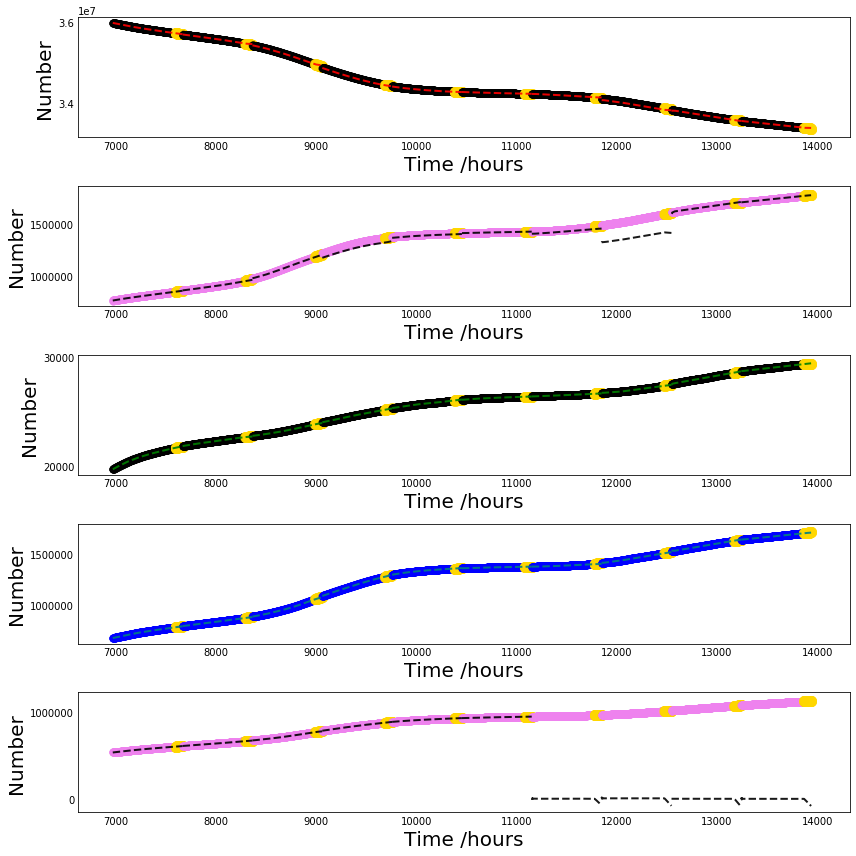

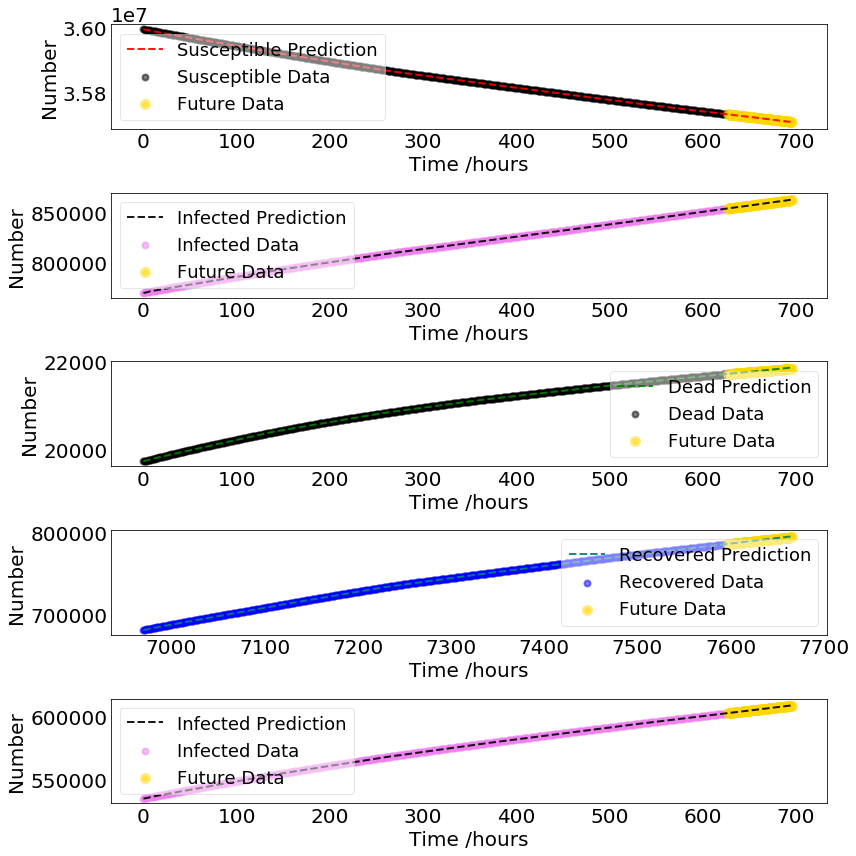

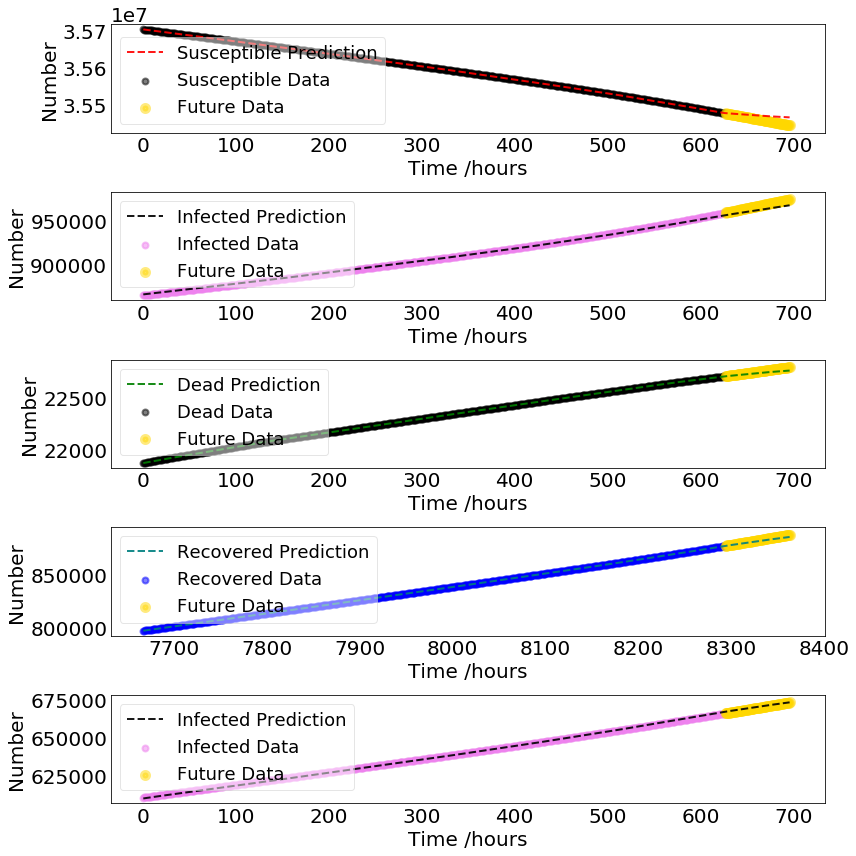

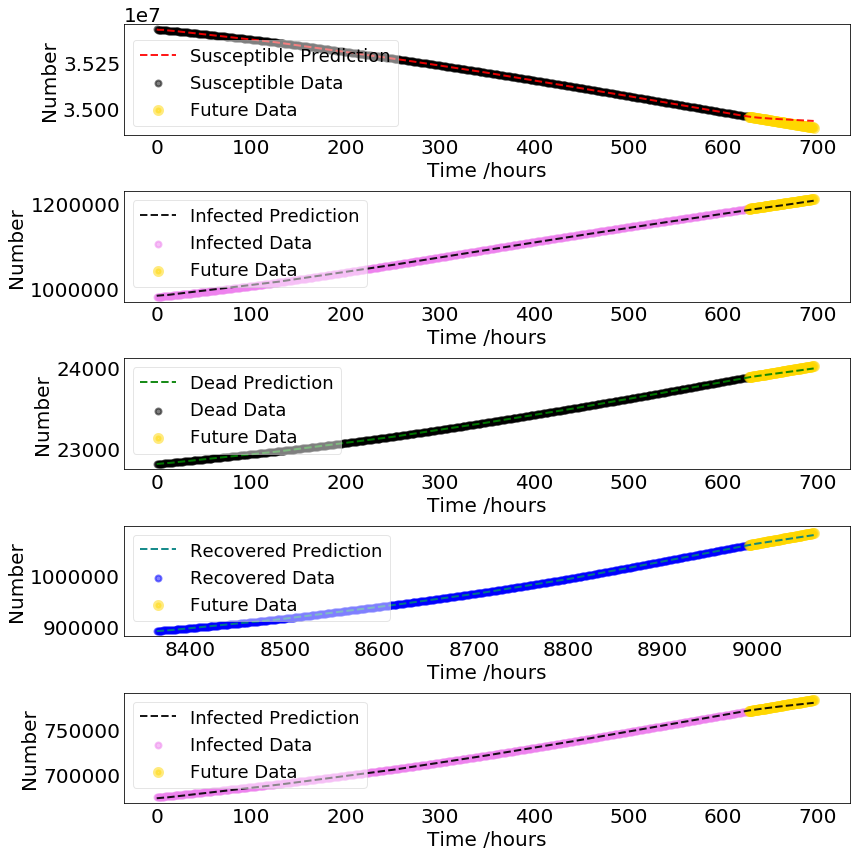

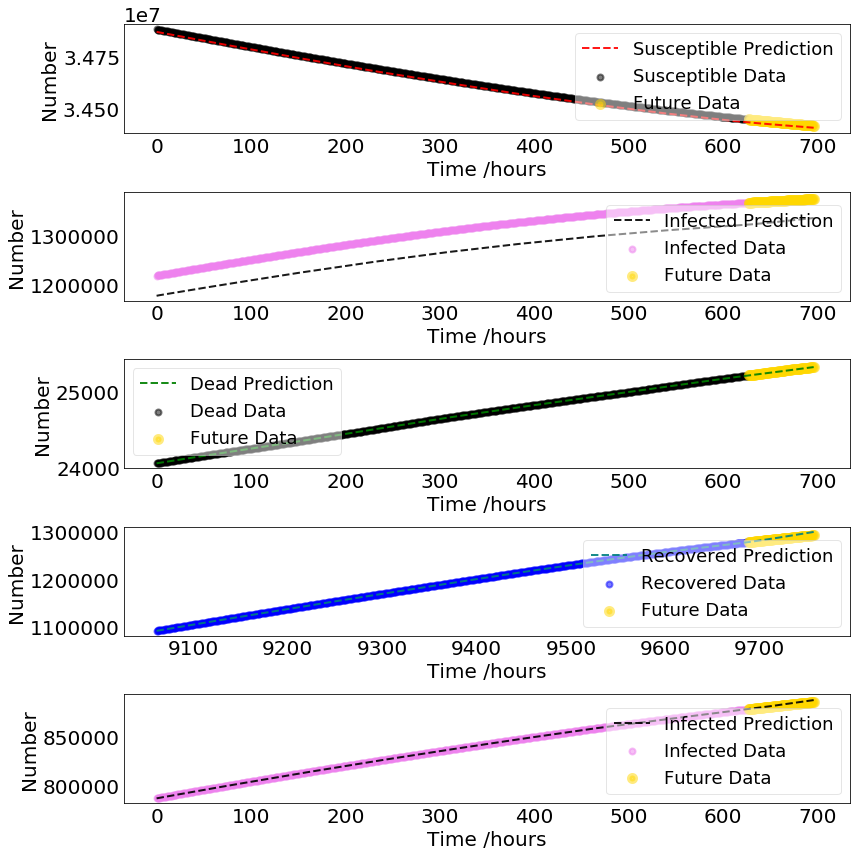

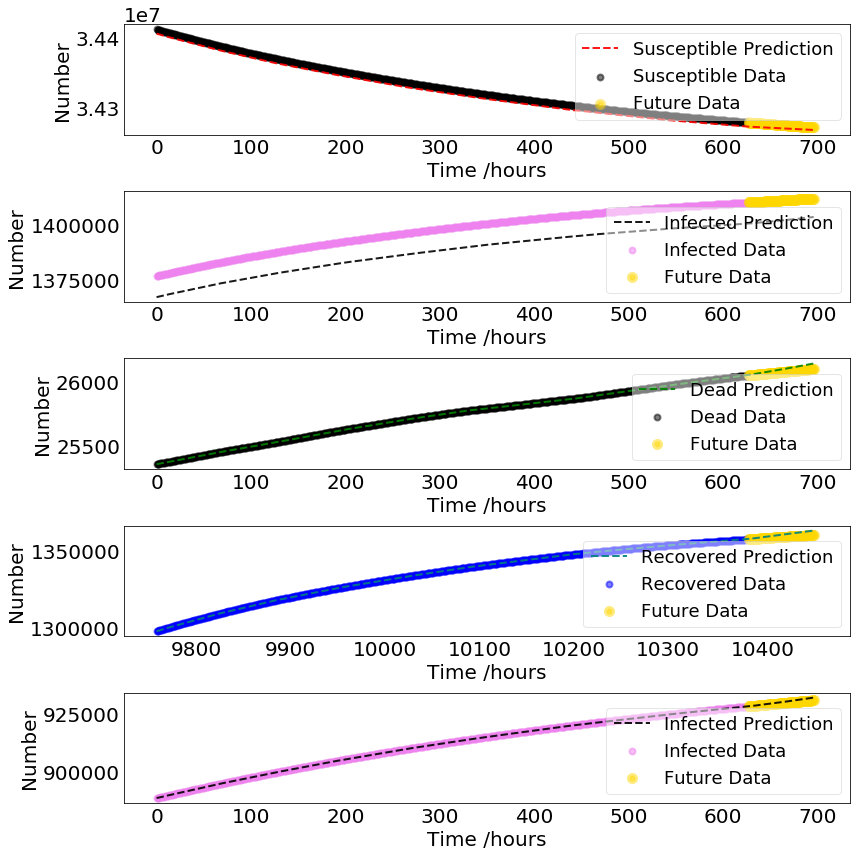

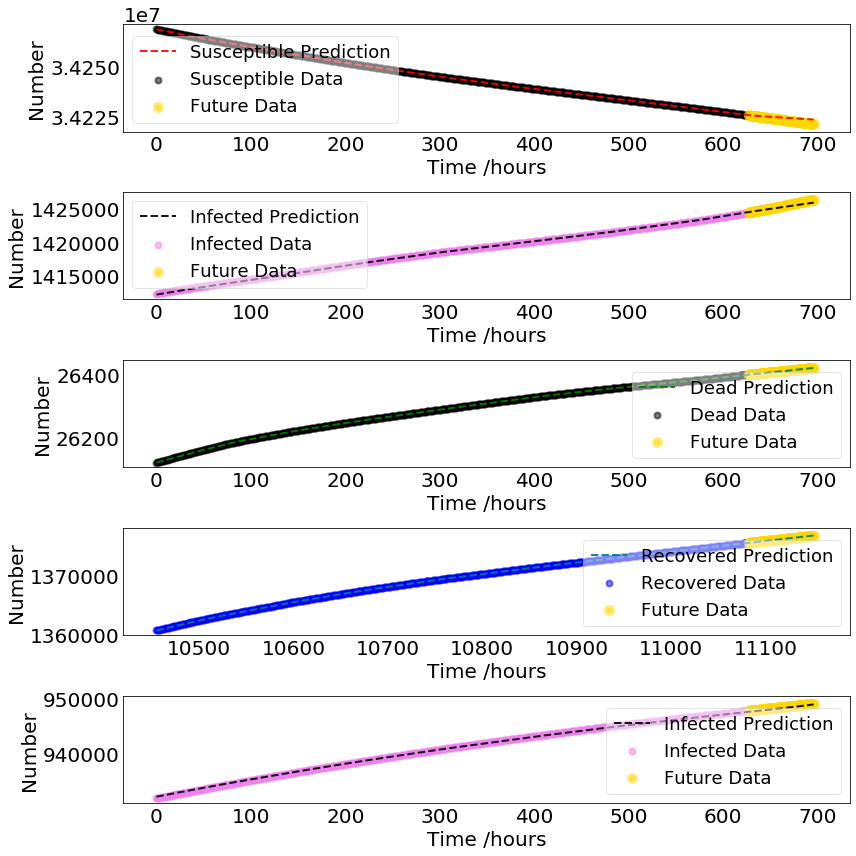

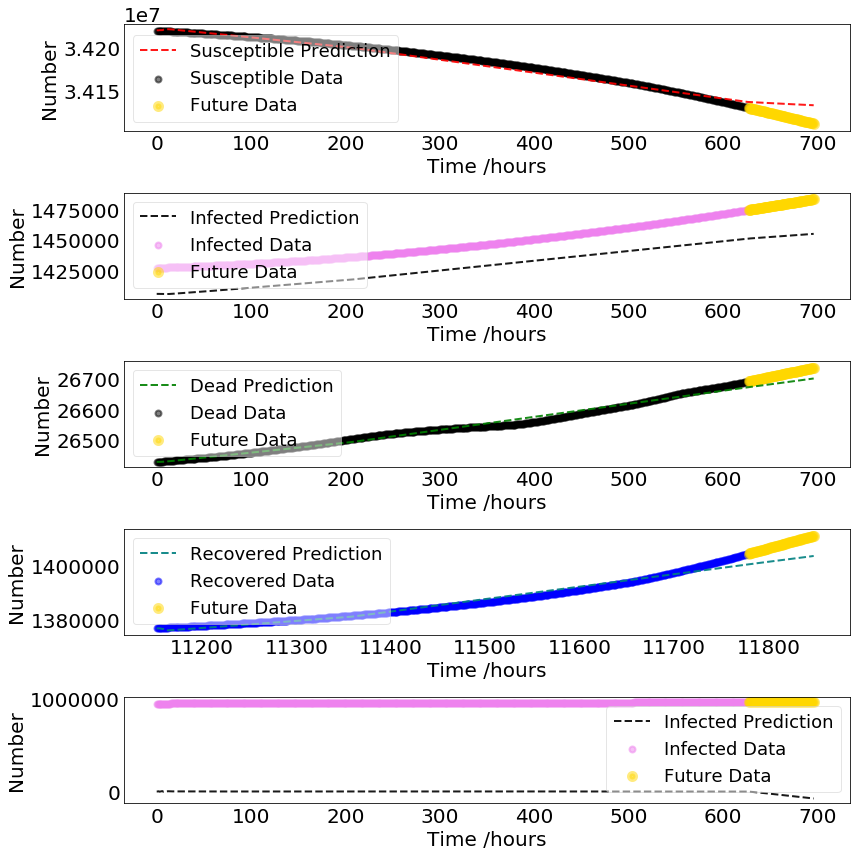

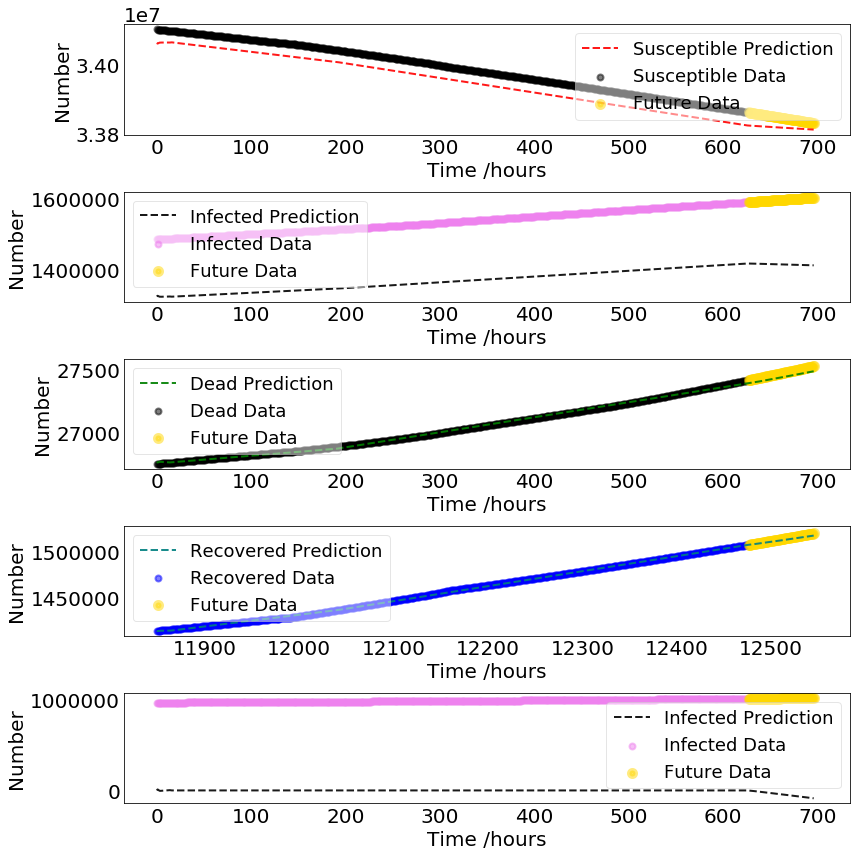

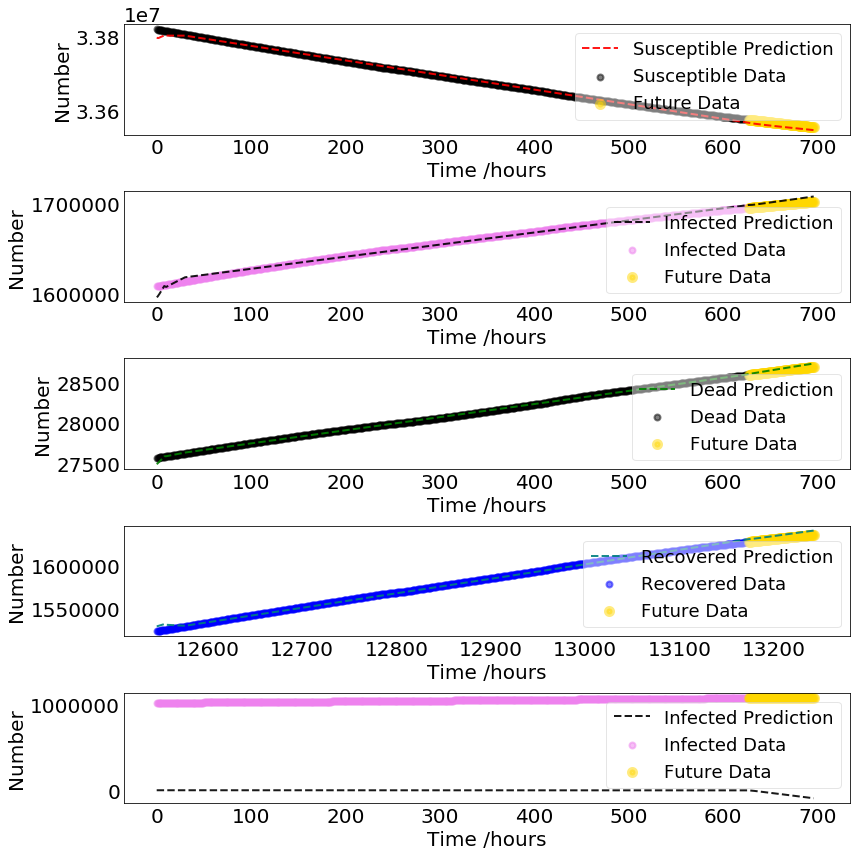

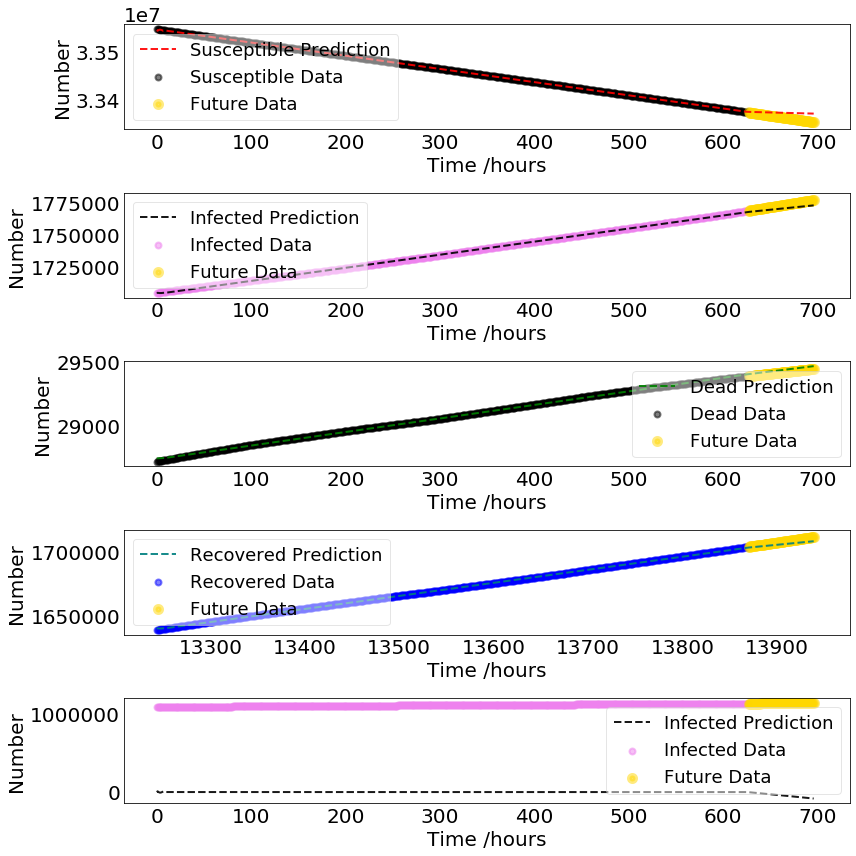

In [21]:

fig, ax = plt.subplots(5, 1, figsize = (12,12))

plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 


ax[0].set_facecolor('xkcd:white')
ax[1].set_facecolor('xkcd:white')
ax[2].set_facecolor('xkcd:white')
ax[3].set_facecolor('xkcd:white')

for i in range (10,20):
    
    plotting(i)
       
ax[0].get_legend().remove()
ax[1].get_legend().remove()
ax[2].get_legend().remove()
ax[3].get_legend().remove()
ax[4].get_legend().remove()
#ax[2, 1].remove()
fig.tight_layout()

plt.show()

In [22]:
Alpha=[]
Beta=[]
Eta=[]
Delta=[]
Fi=[]
nums = [] 
for i in range (n,m):
    if(out[1][i]):
        nums.append(i)
        Alpha.append(float(out[1][i].alpha))
        Beta.append(float(out[1][i].beta))
        Eta.append(float(out[1][i].eta))
        Delta.append(float(out[1][i].delta))
        Fi.append(float(out[1][i].fi))
#print (Alfa)
#print (list(range(n,m)))
df = pd.DataFrame([Alpha,Beta,Eta,Delta,Fi],index=["Alpha","Beta","Eta","Delta","Fi"],columns=list(nums))
print (df.head())

             10        11        12        13        14            15  \
Alpha  0.000594  0.000460  0.000843  0.307077  0.187876  5.252349e-05   
Beta   0.005677 -0.298147 -0.131248  0.059107  0.143506  1.217282e-01   
Eta   -0.007510  0.425110  0.198124  0.140232 -0.073628 -1.835066e-01   
Delta -0.005275  0.298427  0.131745  0.129782 -0.003968 -1.216960e-01   
Fi     0.000005  0.000002  0.000002  0.000011  0.000022  6.343943e-07   

             16        17        18        19  
Alpha  0.125108  0.474328  0.000588  0.000408  
Beta   0.047402  0.171614 -0.000440 -0.000144  
Eta    0.551484  0.787832  0.548860  0.606114  
Delta  0.007208  0.040609  0.000899  0.000469  
Fi     0.375023  0.200809  0.508448  0.604978  
